In [96]:
import collections as cl
t  = int(input())
for _ in range(t):
    input()
    words = str(input()).split()
    input()
    elements = str(input()).split()
    elm = []
    for word in words:
        y = cl.Counter(word)
        x = cl.Counter(elements)
        x.subtract(y)
        if x.most_common()[:-2:-1][0][1] >= 0:
            elm += [word]
    if len(elm) == 0:
        print(-1)
    else:
        elm = [i for i in set(elm)]
        elm.sort()
        print(' '.join(elm))

-1


In [115]:
import itertools as it
n,k = 7,23
elms = [10, 2, 3, 4, 5, 7, 8]
out = []
def iterunique(iterable):
    tmp = set()
    for i in iterable:
        if not i in tmp:
            yield i
            tmp.add(i)
        
            
for i in it.combinations(elms, 4):
    if sum(i) == k:
        out.append(sorted(i))
out.sort()
print(''.join([' '.join(map(str,i))+'$' for i in iterunique([tuple(i) for i in out])]))


2  3  8  10$2  4  7  10$3  5  7  8$


In [153]:
def twoseq(iterable):
    it = iter(iterable)
    try:
        while True:
            x = [next(it)]
            y = [next(it)]
            yield x + y
    except BaseException:
        pass
def setseq(iterable):
    for i in iterable:
        x, y = i
        yield { i for i in range(x, y+1)}
elms = [1, 3, 2, 4, 6, 8, 9, 10]
# elms = [6, 8, 1, 9, 2, 4, 4, 7]
elms = sorted([i for i in twoseq(elms)])
prev = None
seq = []
has = False
# print(elms)
for i in setseq(elms):
#     print(i)
    if prev is None:
        prev = i
        has = False
    elif len(prev & i) > 0:
#         print("yes")
        prev |= i
#         print(prev)
        has = True
    else:
        seq += [sorted([i for i in prev])]
        prev = i
        has = False
seq += [sorted([i for i in prev])]
elms = []
for i in seq:
    elms += [[i[0],i[-1]]]
elms.sort()
def flatten(it):
    for i in it:
        yield str(i[0])
        yield str(i[1])
print(' '.join(flatten(elms)))
    
    
        

        

1 4 6 8 9 10


In [168]:
import itertools as it
import math
data = "00100101"
indexes = [k for k, i in enumerate(data) if i == '1']
def revseq(start,end):
    while start >= end:
        yield start
        start -= 1
n = len(indexes)
r = 2
val  = 1
for i in revseq(n,n-r + 1):
    val *= i
print(val//2)


3


# codechef
praveen, arjun

In [224]:
import collections as cl
import itertools as it
n, q = 11, 6
edges = [(1,2), (2, 3), (2, 4),(4, 5),(4, 6),(2, 8),(2, 7),(7, 9),(7, 10),(11, 10)]
query = [(5, 10),(1, 9),(6, 10),(3 ,7),(2, 9),(9, 2)]

# n, q = 20, 4
# edges = [(1, 2),(2, 3),(2 ,4),(4 ,6),(5, 6),(6, 20),(8, 20),(7, 20),(4, 9),(9, 10),(10, 19),(17, 19),(18, 19),(10, 11),(11, 12),(11, 13),(13, 14),(13, 15),(15, 16)]
# query = [(4, 10),(1, 16),(17, 18),(11, 11)]
tree = cl.defaultdict(set)
for i, j in edges:
    tree[i].add(j)
    tree[j].add(i)
weights = cl.defaultdict(int)
print(tree)


for i in range(1, n + 1):
    if len(tree[i])> 2:
        weights[i] = 2
    else:
        if len(tree[i]) == 2:
            t1, t2 = tree[i]
            if len(tree[t1]) > 2 and len(tree[t2]) > 2:
                weights[i] = 2
            else:
                weights[i] = 1
        else:
            weights[i] = 1
            
            
print(weights)
def bfs(graph, src, dst, visited = set(), path = []):
    visited.add(src)
    if src == dst:
        return path + [src]
    else:
        for i in graph[src]:
            if not i in visited:
                res = bfs(graph, i, dst, visited,  path + [src])
                if res != None:
                    return res
def twiter(it):
    it = iter(it)
    c = next(it)
    p = None
    for i in it:
        p = c
        c = i
        yield (p,c)
        
for i, j in query:
    tmp =  bfs(tree, i, j, set(), [])
    tmp  = [(i,weights[i]) for i in tmp]
    print(tmp)
    
    count = 0
    l = len(tmp)
    for k in range(l):
        for m in range(k+1,l):
            if tmp[k][1] > tmp[m][1]:
                count +=1
    print(count)
            
        
    
            
            


defaultdict(<class 'set'>, {1: {2}, 2: {8, 1, 3, 4, 7}, 3: {2}, 4: {2, 5, 6}, 5: {4}, 6: {4}, 7: {9, 2, 10}, 8: {2}, 9: {7}, 10: {11, 7}, 11: {10}})
defaultdict(<class 'int'>, {1: 1, 2: 2, 3: 1, 4: 2, 5: 1, 6: 1, 7: 2, 8: 1, 9: 1, 10: 1, 11: 1})
[(5, 1), (4, 2), (2, 2), (7, 2), (10, 1)]
3
[(1, 1), (2, 2), (7, 2), (9, 1)]
2
[(6, 1), (4, 2), (2, 2), (7, 2), (10, 1)]
3
[(3, 1), (2, 2), (7, 2)]
0
[(2, 2), (7, 2), (9, 1)]
2
[(9, 1), (7, 2), (2, 2)]
0


In [235]:
s = "12:05:45AM"
dom = s[-2:]
h, m, s = [int(i) for i in s[:-2].split(':')]
if dom == 'PM' and h != 12:
    h += 12
elif dom == 'AM' and h == 12:
    h = 0
print("{:02}:{:02}:{:02}".format(h, m, s))

00:05:45


# Vasya

In [384]:
# from collections import defaultdict
arr = [4, 8, 2, 6]
n = 4
n = int(input())
arr = list(map(int,input().strip().split()))
arr.sort()
m = 0
i = 1
counts = [1]
while i < n:
    count = 1
    for j in range(i):
        if arr[i] % arr[j]  == 0:
            count  = max(counts[j] + 1,count)
    m = max(m, count)
    counts += [count]
    i += 1
if m <= 1:
    m =-1
print(m)

3 [1, 2, 2, 3]


# Floyd warshall with path generator addon

In [2]:
from collections import defaultdict
import math

math.inf = float('Inf') #avoid crashing with python2

# initialize weighted graph
dist = [
    [0,   1,   2, math.inf],
    [math.inf, math.inf, math.inf, 1],
    [math.inf, math.inf, 0,   2],
    [2, math.inf, math.inf,   0],
]
#data structure to store distance vector
path = defaultdict(defaultdict)
v = 4 #number of vertices
#floyd warshall
for i in range(v):
    for j in range(v):
        for k in range(v):
            # addon code to generate path
            # else it is just dist[j][k] = min(dist[j][k], dist[j][i] + dist[i][k])
            val = dist[j][i] + dist[i][k]
            if dist[j][k] > val:
                path[j][k] = i
                dist[j][k] = val
            else:
                try:
                    path[j][k]
                except:
                    if dist[j][k] != math.inf:
                        path[j][k] = k
            #end addon

# get shortest path's total weight
def getWeight(g_dist, src, dst):
    '''
    type g_dist : 2d Integer weight list
    type src    : Integer
    type dst    : Integer
    '''
    return g_dist[src][dst]
    

def getPath(g, src, dst):
    '''
        path generator
        type g   : defaultdict(defaultdict)
        type src : Integer
        type dst : Integer
    '''
    # pythonic checking of no path since it is a default dict with two level
    # It should throw error
    try:
        g[src][dst]
    except:
        return
    # starting node
    yield src
    # all other
    while src != dst:
        src = g[src][dst]
        yield src
    pass

# result
print(list(getPath(path, 1, 0)))
print(getWeight(dist, 1,0))


[1, 3, 0]
3


# Kruskal's algorithm

In [407]:
from collections import namedtuple
Edge = namedtuple('Edge', 'x y w')
edges = [Edge(x,y,w) for x,y,w in [(1,2,1),(1,3,2),(2,4,1),(3,4,4)]]
print(edges)

# later

[Edge(x=1, y=2, w=1), Edge(x=1, y=3, w=2), Edge(x=2, y=4, w=1), Edge(x=3, y=4, w=4)]


In [390]:
primes = [2, 3, 5, 7]
for i in range(10,10000):
    for j in [2, 3, 5, 7]:
        if i % j == 0:
            break
    else:
        primes += [i]
print(primes)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 121, 127, 131, 137, 139, 143, 149, 151, 157, 163, 167, 169, 173, 179, 181, 187, 191, 193, 197, 199, 209, 211, 221, 223, 227, 229, 233, 239, 241, 247, 251, 253, 257, 263, 269, 271, 277, 281, 283, 289, 293, 299, 307, 311, 313, 317, 319, 323, 331, 337, 341, 347, 349, 353, 359, 361, 367, 373, 377, 379, 383, 389, 391, 397, 401, 403, 407, 409, 419, 421, 431, 433, 437, 439, 443, 449, 451, 457, 461, 463, 467, 473, 479, 481, 487, 491, 493, 499, 503, 509, 517, 521, 523, 527, 529, 533, 541, 547, 551, 557, 559, 563, 569, 571, 577, 583, 587, 589, 593, 599, 601, 607, 611, 613, 617, 619, 629, 631, 641, 643, 647, 649, 653, 659, 661, 667, 671, 673, 677, 683, 689, 691, 697, 701, 703, 709, 713, 719, 727, 731, 733, 737, 739, 743, 751, 757, 761, 767, 769, 773, 779, 781, 787, 793, 797, 799, 803, 809, 811, 817, 821, 823, 827, 829, 839, 841, 851, 853, 857, 859, 863, 869, 871, 877, 881, 883

In [408]:
a = 'aabxbxbaa'
etr = 0
eor = 0
print(a)
for i in range(1,len(a)):
    ee = '::'
    oe = '::'
    print('start',a[i], end=' ')
    if etr >= 0:
        ee = a[etr]
    if eor >= 0:
        oe = a[eor]
    e = a[i]
    if e == ee:
        print('either',ee,i + 1 - etr , end='')
    elif e == oe:
        print('or',oe, i + 1 - eor , end='')
        eor -= 1
        
    else:
        print('neither',ee, 'nor',oe)
        eor, etr = i-1, i
    print()
    
        
        
    

aabxbxbaa
start a either a 2
start b neither a nor a

start x neither b nor a

start b or b 3
start x either x 3
start b neither x nor a

start a neither b nor x

start a either a 2


In [506]:
import PIL.Image as im
import numpy as np

pic = im.open('test.jpg')
width, height = pic.width, pic.height

pic = pic.convert('L')
array = np.array(pic)
array  = array.flatten()


import random

#generating random seed password
seed = random.randint(100,1000000)


#random sequence generator
def random_seq(length, seed):
    tmp = set()
    random.seed(seed)
    while len(tmp) != length:
        r = random.randint(0, length -1)
        if not r in tmp:
            tmp.add(r)
            yield r
            
def encode(data_bin, seq):
    crypt = [0 for i in data_bin]
    for i, loc in enumerate(seq):
        crypt[loc] = data_bin[i]
    return crypt

def getNum(binary):
    out = 0
    for i in binary:
        out = (out << 1)|(i == '1')
    return out
        
# print("encoded : ", getNum(encoded))
def decode(crypt_bin, seq):
    data = [0 for i in crypt_bin]
    for i, loc in enumerate(seq):
        data[i] = crypt_bin[loc]
    return data

def encode_array(array, seed, bits):
    crypt = []
    seq = list(random_seq(bits, seed))
    for i, e in enumerate(array):
        data_bin = "{:08}".format(int(bin(e)[2:]))
        data_len = len(data_bin)
        encoded = encode(data_bin, seq)
        crypt += [getNum(encoded)]
    return crypt
        

crypt = encode_array(array, seed, 8)



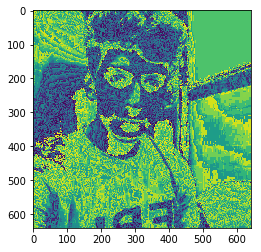

In [507]:
import matplotlib.pyplot as plt
img = np.reshape(crypt, (width, height))
plt.imshow(img)
plt.show()

In [509]:
def decode_array(array, seed, bits):
    crypt = []
    seq = list(random_seq(bits, seed))
    for i, e in enumerate(array):
        data_bin = "{:08}".format(int(bin(e)[2:]))
        data_len = len(data_bin)
        encoded = decode(data_bin, seq)
        crypt += [getNum(encoded)]
    return crypt

uncrypt = decode_array(crypt, seed, 8)

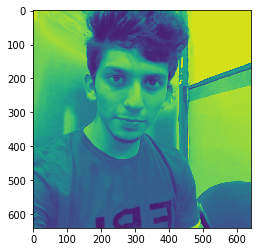

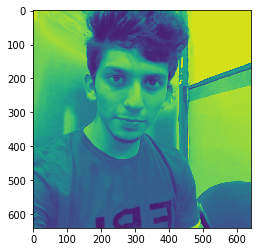

In [510]:
img_recovered = np.reshape(uncrypt, (width, height))
plt.imshow(img_recovered)
plt.show()
plt.imshow(pic)
plt.show()

In [521]:
uncrypt
second = encode(uncrypt, list(random_seq(len(uncrypt), seed)))

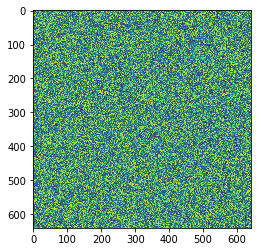

In [516]:
sim = np.reshape(second, (width, height))
plt.imshow(sim)
plt.show()

In [524]:
second_decode = decode(second,list(random_seq(len(uncrypt), seed )) )

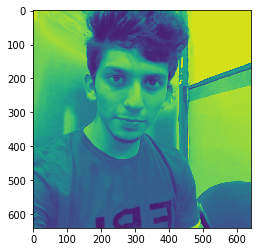

In [525]:
sim2 = np.reshape(second_decode, (width, height))
plt.imshow(sim2)
plt.show()